# Regression Analysis of Birth Weight Dataset

conditions:

test_size = 0.25

random_state= 219


## Dataset Exploration

In [1]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model 


#define file 
file= 'birthweight_low.xlsx'

#from excel to python
bw_low_org=pd.read_excel(io=file)

#display the first 10 rows to get an idea of the dataset
bw_low_org.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
#find out number of obs and features
bw_low_org.shape

(196, 18)

In [3]:
#general info about the data
bw_low_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


The y variable is an integer, it violates the continuity, so there is a normal misalignment. Time to deeper analyze the response variable.

## Feature Engineering

In [4]:
#make a copy to not modify original data
bw_low = bw_low_org.copy()

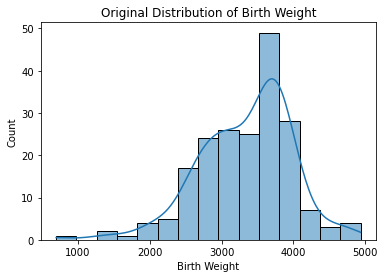

In [5]:
#plot an histogram to observe the distribution of the y-variable
sns.histplot(data  = bw_low,
             x     = "bwght",
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") 
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [6]:
#make the log function of y just in case is needed
bw_low['log_bwght'] = np.log(bw_low['bwght']) 

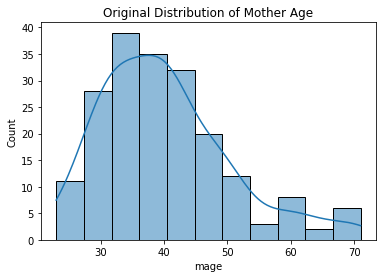

In [7]:
#explore other variable distribution
sns.histplot(data  = bw_low,
             x     = "mage",
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Mother Age")
plt.xlabel(xlabel = "mage") 
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

In [8]:
#log to decrease the skewness
bw_low['log_mage'] = np.log(bw_low['mage'])

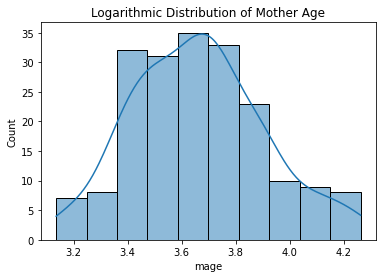

In [9]:
#check if the distribution is less skewed
sns.histplot(data   = bw_low,
          x      = "log_mage",
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother Age")
plt.xlabel(xlabel = "mage")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

#better ditribution with log

In [10]:
#descriptive statistics to get an idea
bw_low.describe(include = 'number').round(decimals=2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_mage
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,8.09,3.66
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70,0.23,0.24
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,6.55,3.14
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,7.98,3.50
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,8.15,3.66
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,8.23,3.83
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,8.50,4.26


In [11]:
#analyze how the continuous variable are related to birth weight 
continuous_data = ['omaps','fmaps','bwght']


#correlation matrix on continuous features
bw_corr = bw_low[continuous_data].corr(method = 'pearson')


#show correlations with only birth weight 
bw_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
omaps    0.25
fmaps    0.25
Name: bwght, dtype: float64

In [12]:
bw_low.isnull().sum(axis=0)
#missing values per features are < 5% of the observations 
#so we can replace just with 0 instead of median/mean

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_mage     0
dtype: int64

In [13]:
# looping to detect features with missing values
for col in bw_low:

    # creating columns with 1s if missing and 0 if not
    if bw_low[col].isnull().astype(int).sum() > 0:
        bw_low['m_'+col] = bw_low[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
bw_low.iloc[   : , -3:   ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [14]:
#filling missing value with 0
fill = 0

bw_low['meduc'] = bw_low['meduc'].fillna(value=fill)
bw_low['npvis'] = bw_low['npvis'].fillna(value=fill)
bw_low['feduc'] = bw_low['feduc'].fillna(value=fill)

#check
bw_low.isnull().any(axis=0).any(axis=0)

False

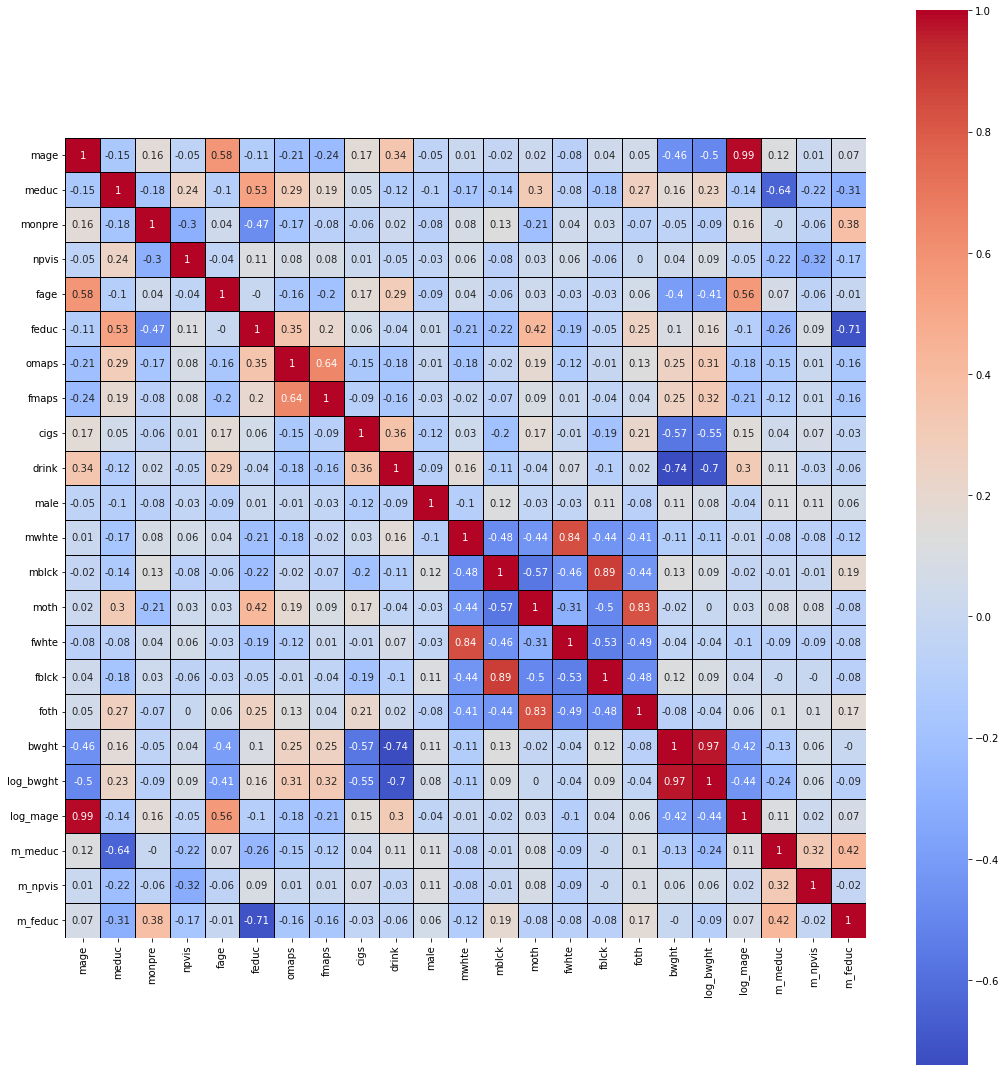

In [15]:
#big correlation matrix for a general idea
bw_corr = bw_low.corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(bw_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# saving and displaying the correlation matrix

plt.tight_layout()
plt.show()

In [16]:
#I used this code to see the different variables together in the model
lm_bw = smf.ols(formula = """bwght ~ fmaps+
                                    meduc+ 
                                    log_mage+
                                    drink+
                                    cigs""",
                        data = bw_low)


# telling Python to FIT the data to the blueprint
results = lm_bw.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     92.22
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.53e-49
Time:                        00:56:01   Log-Likelihood:                -1425.4
No. Observations:                 196   AIC:                             2863.
Df Residuals:                     190   BIC:                             2882.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5053.7776    591.769      8.540      0.0

In [17]:
# placeholder variables
bw_low['idmage'] = 0
bw_low['nudrink']  = 0
bw_low['lowomaps'] = 0
bw_low['lowfmaps'] = 0
bw_low['nunpvis'] = 0
bw_low['numonpre'] = 0
bw_low['nucigs'] = 0


#creating new variables based on resourches
for index, value in bw_low.iterrows():
#https://www.marsden-weighing.co.uk/blog/factors-affect-baby-birth-weight   
    if bw_low.loc[index, 'mage'] < 20 or bw_low.loc[index, 'mage'] >= 35 :
        bw_low.loc[index, 'idmage'] = 1 
#https://bmcpregnancychildbirth.biomedcentral.com/articles/10.1186/s12884-018-1694-4        
    if bw_low.loc[index,'cigs'] > 6:
        bw_low.loc[index,'nucigs'] = 1
#https://pubmed.ncbi.nlm.nih.gov/6471316/
    if bw_low.loc[index, 'drink'] > 7:
        bw_low.loc[index, 'nudrink'] = 1
#https://pubmed.ncbi.nlm.nih.gov/9417155/        
    if bw_low.loc[index, 'omaps'] > 3:
        bw_low.loc[index, 'lowomaps'] = 1
        
    if bw_low.loc[index, 'fmaps'] > 6:
        bw_low.loc[index, 'lowfmaps'] = 1
        
#https://bmcpregnancychildbirth.biomedcentral.com/articles/10.1186/s12884-015-0541-0        
    if bw_low.loc[index, 'npvis'] < 7:
        bw_low.loc[index, 'nunpvis'] = 1
    
    if bw_low.loc[index, 'monpre'] > 3:
        bw_low.loc[index, 'numonpre'] = 1
        
        
        
        

In [18]:
df_corr = bw_low.corr().round(2)


# printing (Pearson) correlations with birthweight
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght        1.00
log_bwght    0.97
omaps        0.25
fmaps        0.25
lowfmaps     0.22
meduc        0.16
lowomaps     0.16
mblck        0.13
fblck        0.12
male         0.11
feduc        0.10
m_npvis      0.06
npvis        0.04
m_feduc     -0.00
moth        -0.02
fwhte       -0.04
numonpre    -0.04
monpre      -0.05
foth        -0.08
nunpvis     -0.09
mwhte       -0.11
m_meduc     -0.13
idmage      -0.16
nucigs      -0.36
fage        -0.40
log_mage    -0.42
mage        -0.46
cigs        -0.57
nudrink     -0.59
drink       -0.74
Name: bwght, dtype: float64


In [19]:
df_corr = bw_low.corr().round(2)


# printing (Pearson) correlations with log birth weight
print(df_corr.loc['log_bwght'].sort_values(ascending = False))

log_bwght    1.00
bwght        0.97
fmaps        0.32
omaps        0.31
lowfmaps     0.24
meduc        0.23
lowomaps     0.16
feduc        0.16
fblck        0.09
npvis        0.09
mblck        0.09
male         0.08
m_npvis      0.06
moth         0.00
foth        -0.04
fwhte       -0.04
m_feduc     -0.09
numonpre    -0.09
monpre      -0.09
mwhte       -0.11
nunpvis     -0.15
idmage      -0.16
m_meduc     -0.24
nucigs      -0.32
fage        -0.41
log_mage    -0.44
mage        -0.50
cigs        -0.55
nudrink     -0.57
drink       -0.70
Name: log_bwght, dtype: float64


In [20]:
#trying other model
lm_bw = smf.ols(formula = """bwght ~ nucigs+
                                    mage+
                                    cigs+
                                    log_mage+
                                    drink""",
                        data = bw_low)


# telling Python to FIT the data to the blueprint
results = lm_bw.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.40e-52
Time:                        00:56:01   Log-Likelihood:                -1417.2
No. Observations:                 196   AIC:                             2846.
Df Residuals:                     190   BIC:                             2866.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -930.7016   1771.125     -0.525      0.6

In [21]:
#creating a new variable as the sum of 2 columns
bw_low['maps']=bw_low['omaps']+bw_low['fmaps']


In [22]:
#dropping unuseful columns

bw_low = bw_low.drop(['log_bwght'],axis=1)#I tried but better without the log
bw_low = bw_low.drop(['nucigs'],axis=1)
bw_low = bw_low.drop(['m_npvis'],axis=1)
bw_low = bw_low.drop(['mage'],axis=1)

In [23]:
# making a copy of bw_low
bw_low_exp = bw_low.copy()


# dropping SalePrice and Order from the explanatory variable set
bw_low_exp = bw_low_exp.drop(['bwght'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in bw_low_exp:
    print(f"{val} +")

meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_mage +
m_meduc +
m_feduc +
idmage +
nudrink +
lowomaps +
lowfmaps +
nunpvis +
numonpre +
maps +


In [24]:
# saving feature-rich dataset in Excel
bw_low.to_excel('bw_feature_rich.xlsx',
                 index = False)

## Training and Testing Sets Creation

In [25]:
#preparing x variables
bw_low_data= bw_low.drop(['bwght'],
                           axis = 1)


# preparing response variables
bw_low_target = bw_low.loc[ : , 'bwght'] 


# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(bw_low_data,
                                                    bw_low_target,
                                                    test_size = 0.25,
                                                    random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")
bw_low


Training Data
-------------
X-side: (147, 26)
y-side: (147,)


Testing Data
------------
X-side: (49, 26)
y-side: (49,)



,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,...,log_mage,m_meduc,m_feduc,idmage,nudrink,lowomaps,lowfmaps,nunpvis,numonpre,maps
0,0.0,5,2.0,62,0.0,4,7,23,9,1,...,4.234107,1,1,1,1,1,1,1,1,11
1,12.0,3,10.0,61,11.0,4,6,25,11,1,...,4.219508,0,0,1,1,1,0,0,0,10
2,12.0,3,6.0,46,12.0,2,7,21,12,1,...,4.262680,0,0,1,1,0,1,1,0,9
3,16.0,1,8.0,48,16.0,7,8,21,10,0,...,4.077537,0,0,1,1,1,1,0,0,15
4,12.0,4,6.0,39,12.0,2,9,17,13,0,...,3.871201,0,0,1,1,0,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,12.0,5,12.0,38,0.0,5,7,3,2,1,...,3.401197,0,1,0,0,1,1,0,1,12
192,14.0,2,12.0,47,16.0,8,9,10,4,1,...,3.713572,0,0,1,0,1,1,0,0,17
193,15.0,2,15.0,38,13.0,8,8,0,1,0,...,3.496508,0,0,0,0,1,1,0,0,16
194,17.0,2,6.0,43,14.0,9,10,8,4,1,...,3.433987,0,0,0,0,1,1,1,0,19


In [26]:
# declaring set of x-variables
x_variables = ['cigs','meduc','drink','fage']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

cigs +
meduc +
drink +
fage +


In [27]:
#concate the training 
bw_low_train = pd.concat([x_train, y_train], axis = 1)


#build a model
lm_best = smf.ols(formula =  """bwght ~
cigs +
meduc +
drink +
fage  """,
                                data = bw_low_train)   


#fit the model based on the data
results = lm_best.fit()



#analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     78.07
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.91e-35
Time:                        00:56:02   Log-Likelihood:                -1079.2
No. Observations:                 147   AIC:                             2168.
Df Residuals:                     142   BIC:                             2183.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4570.7159    216.449     21.117      0.0

## Model Development

In [28]:
#defining which are the ols_data
ols_data = bw_low.loc[:,x_variables]


#FULL
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            bw_low_data,     # x-variables
            bw_low_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,        
            bw_low_target,   
            test_size = 0.25,
            random_state = 219)



### Linear Regression (OLS)

In [29]:
#defining the regressor
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6874
OLS Testing Score  : 0.7146
OLS Train-Test Gap : 0.0272


In [30]:
lr_model_values = zip(bw_low_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4570.72)
('cigs', -38.8)
('meduc', 25.99)
('drink', -115.54)
('fage', -13.44)


### Lasso Regression

In [31]:
#defining lasso model
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0, 
                                         normalize = True) 


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))




# saving scoring data to show later
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) 
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   


# displaying and saving the gap between training and testing to also show later
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7508
Lasso Testing Score  : 0.6203
Lasso Train-Test Gap : 0.1305


In [32]:
lasso_model_values = zip(bw_low_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 6286.45)
('meduc', 15.98)
('monpre', -0.0)
('npvis', -0.0)
('fage', -2.97)
('feduc', 11.73)
('omaps', 0.0)
('fmaps', 64.08)
('cigs', -37.48)
('drink', -87.99)
('male', 55.48)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -37.84)
('fwhte', -0.0)
('fblck', 0.0)
('foth', -0.0)
('log_mage', -816.87)
('m_meduc', 0.0)
('m_feduc', 168.32)
('idmage', 200.05)
('nudrink', -114.77)
('lowomaps', 0.0)
('lowfmaps', 0.0)
('nunpvis', -96.78)
('numonpre', 0.0)
('maps', 0.0)


### Bayesian Automatic Relevance Determination (ARD)

In [33]:
#defining ard model
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)

#score the results
print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data to show later
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing to show later
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7446
Testing Score : 0.6472
ARD Train-Test Gap : 0.0974


In [34]:
ard_model_values = zip(bw_low_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 7197.69)
('meduc', 21.7724)
('monpre', -0.0006)
('npvis', -0.00016)
('fage', -0.00187)
('feduc', 0.0055)
('omaps', 0.0009)
('fmaps', 50.58291)
('cigs', -39.38905)
('drink', -97.54406)
('male', 39.88584)
('mwhte', 0.00026)
('mblck', 0.00039)
('moth', -0.00072)
('fwhte', -0.00041)
('fblck', 0.00055)
('foth', -0.0001)
('log_mage', -1045.5535)
('m_meduc', 0.00091)
('m_feduc', 0.00074)
('idmage', 292.55843)
('nudrink', -56.41908)
('lowomaps', 0.00027)
('lowfmaps', 0.00068)
('nunpvis', -30.12524)
('numonpre', 0.00029)
('maps', 0.00144)


# Results

In [35]:
#showing the result with dynamic string

print(f"""
Model      Train Score      Test Score         Gap
-----      -----------      ----------      ----------
OLS *       {lr_train_score}           {lr_test_score}           {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}           {ard_test_gap}

*final model""")



# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


Model      Train Score      Test Score         Gap
-----      -----------      ----------      ----------
OLS *       0.6874           0.7146           0.0272
Lasso      0.7508           0.6203           0.1305
ARD        0.7446           0.6472           0.0974

*final model
